In [84]:
!pip install transformers


In [85]:
from transformers import pipeline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [86]:
#classifier = pipeline("text-classification", model="aubmindlab/bert-base-arabertv02", tokenizer="aubmindlab/bert-base-arabertv02")
classifier = pipeline('text-classification', model='CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment')


In [87]:
result = classifier("هذا فيلم رائع جدًا!")
print(result)

[{'label': 'positive', 'score': 0.984131395816803}]


In [88]:
result1 = classifier("هذا فيلم ممل جدًا!")
print(result1)

[{'label': 'negative', 'score': 0.9953576922416687}]


In [89]:
# prompt: give me list of positive and negative sentences and classifier it by my classifier for arabic

# Positive sentences
positive_sentences = [
    "هذا فيلم رائع جدًا!",
    "لقد استمتعت حقًا بهذا الكتاب.",
    "المطعم الجديد الذي ذهبنا إليه كان رائعًا.",
    "أنا أحب هذه الأغنية كثيرا.",
    "لقد قضيت وقتًا رائعًا في الإجازة."
    "هذا الفيلم ممل حقًا.",
    "لم أستمتع بهذا الكتاب على الإطلاق.",
    "المطعم الجديد الذي ذهبنا إليه كان سيئًا.",
    "أنا أكره هذه الأغنية.",
    "لقد قضيت وقتًا ممتع في الإجازة."
]
classifier(positive_sentences )

[{'label': 'positive', 'score': 0.984131395816803},
 {'label': 'positive', 'score': 0.9802350997924805},
 {'label': 'positive', 'score': 0.657397985458374},
 {'label': 'positive', 'score': 0.9935298562049866},
 {'label': 'negative', 'score': 0.9814165830612183},
 {'label': 'positive', 'score': 0.48542284965515137},
 {'label': 'positive', 'score': 0.657397985458374},
 {'label': 'negative', 'score': 0.9936226010322571},
 {'label': 'positive', 'score': 0.9877203106880188}]

In [90]:
type(classifier)

transformers.pipelines.text_classification.TextClassificationPipeline

In [91]:
import torch
torch.cuda.is_available

<function torch.cuda.is_available() -> bool>

In [92]:
classifier=pipeline('text-classification', model='CAMeL-Lab/bert-base-arabic-camelbert-ca-sentiment')

In [93]:
df_ = pd.read_excel("data1500.xlsx")
df_.head()

,text,label
0,هذا انسان الله يبارك باين فحل وخدام ربي يعاونك...,pos
1,بوتسريقة أس 2,neg
2,الحدود قافلينها علينا وقاعات الشطيح والرديح جا...,neg
3,بربي انشاء الله,pos
4,معضم الأوروبيون لا يؤمنون بأي دين خاصة عندما ي...,neg


<Axes: >

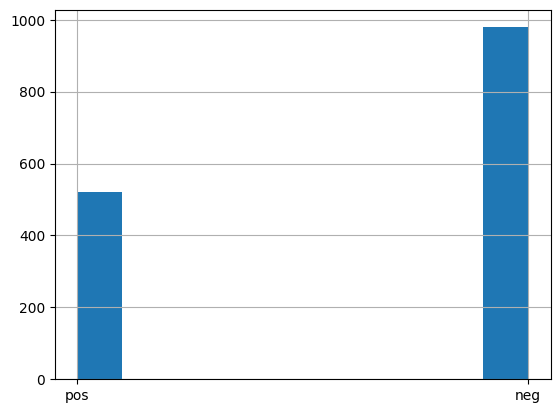

In [94]:
df_['label'].hist()

In [95]:
len(df_)

1500

In [96]:
target_map={'pos':1, 'neg':0}
df_['target']= df_['label'].map(target_map)
df_.head()

,text,label,target
0,هذا انسان الله يبارك باين فحل وخدام ربي يعاونك...,pos,1
1,بوتسريقة أس 2,neg,0
2,الحدود قافلينها علينا وقاعات الشطيح والرديح جا...,neg,0
3,بربي انشاء الله,pos,1
4,معضم الأوروبيون لا يؤمنون بأي دين خاصة عندما ي...,neg,0


In [97]:
texts = df_['text'].tolist()
predictions = classifier(texts)
predictions

[{'label': 'negative', 'score': 0.7124828696250916},
 {'label': 'neutral', 'score': 0.640619158744812},
 {'label': 'negative', 'score': 0.9960711002349854},
 {'label': 'positive', 'score': 0.6687005758285522},
 {'label': 'negative', 'score': 0.9787493348121643},
 {'label': 'negative', 'score': 0.9942066669464111},
 {'label': 'neutral', 'score': 0.7502632737159729},
 {'label': 'negative', 'score': 0.6858797669410706},
 {'label': 'positive', 'score': 0.9895743727684021},
 {'label': 'negative', 'score': 0.9710943102836609},
 {'label': 'negative', 'score': 0.9650281071662903},
 {'label': 'negative', 'score': 0.5818182826042175},
 {'label': 'neutral', 'score': 0.5298323631286621},
 {'label': 'negative', 'score': 0.7195101976394653},
 {'label': 'negative', 'score': 0.9610684514045715},
 {'label': 'negative', 'score': 0.4705996513366699},
 {'label': 'negative', 'score': 0.6219010353088379},
 {'label': 'negative', 'score': 0.9033899307250977},
 {'label': 'negative', 'score': 0.9276115298271179

In [98]:
probs = [d['score'] if d['label'].startswith('p') else 1 - d['score'] \
         for d in predictions]
probs

[0.28751713037490845,
 0.359380841255188,
 0.0039288997650146484,
 0.6687005758285522,
 0.021250665187835693,
 0.005793333053588867,
 0.2497367262840271,
 0.31412023305892944,
 0.9895743727684021,
 0.02890568971633911,
 0.03497189283370972,
 0.41818171739578247,
 0.4701676368713379,
 0.28048980236053467,
 0.03893154859542847,
 0.5294003486633301,
 0.3780989646911621,
 0.09661006927490234,
 0.07238847017288208,
 0.8811098337173462,
 0.01359248161315918,
 0.6430642008781433,
 0.2774046063423157,
 0.35379838943481445,
 0.07440811395645142,
 0.744379997253418,
 0.5829983055591583,
 0.13057959079742432,
 0.6314350962638855,
 0.10403561592102051,
 0.003334939479827881,
 0.08060950040817261,
 0.004681050777435303,
 0.8634685277938843,
 0.1458646059036255,
 0.010258913040161133,
 0.26892662048339844,
 0.0635637640953064,
 0.9866952896118164,
 0.8663674592971802,
 0.008655548095703125,
 0.9062743782997131,
 0.026194274425506592,
 0.8403472304344177,
 0.013983666896820068,
 0.4374579191207886,
 

In [99]:
preds = [1 if d['label'].startswith('P') else 0 for d in predictions]

preds = np.array(preds)


In [101]:
print("acc:", np.mean(df_['target']== preds))

acc: 0.6526666666666666


In [102]:
cm = confusion_matrix(df_['target'], preds, normalize= 'true')
cm

array([[1., 0.],
       [1., 0.]])

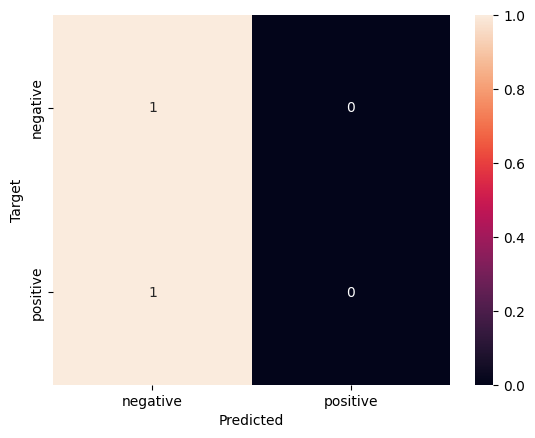

In [103]:
def plot_cm(cm):
  classes =['negative', 'positive']
  df_cm =pd.DataFrame(cm, index=classes, columns=classes)
  ax=sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)



In [105]:
f1_score(df_['target'], preds)

0.0

In [107]:
f1_score(1-df_['target'], 1- preds)

0.7898346107301331